In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np
import matplotlib as mpl

In [3]:
region = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
all_IFN_frac = pd.read_csv('allregions_frac_ifn_celltypes.csv',header = 0, index_col = 0)
all_plaque_comp = pd.DataFrame([], columns = ["AirwayEpithelial",
               "AT1",
               "AT2",
               "BronchoFibroblast",
               "AlveolarFibroblast",
               "MyoFB",
               "Pericyte",
               "SMC",
               "Artery",
               "Vein",
               "Capillary",
               "AlveolarMac",
               "InterstitialMac",
               "InflamMac",
               "PatrolMac",
               "mucosalDC",
               "perivascularDC",
               "pDC",
               "Neutrophil",
               "Tcell",
               "Bcell"])
for i in range(len(region)):
    region_comp = pd.read_csv("region"+region[i]+"_plaque_comp.csv", header = 0, index_col = 0)
    all_plaque_comp = pd.concat([all_plaque_comp, region_comp])

/var/folders/9m/p4wnjjxs5916tfkbxzfts9yw0000gn/T/ipykernel_24845/3426190264.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_plaque_comp = pd.concat([all_plaque_comp, region_comp])


In [4]:
all_load_size = pd.DataFrame([])
for i in range(len(region)):
    region_comp = pd.read_csv("region"+region[i]+"_plaque_load_size.csv", header = 0, index_col = 0)
    all_load_size = pd.concat([all_load_size, region_comp])
all_load_size

,viral_load,plaque_size
0,1.386259,30.0
1,1.375556,36.0
2,2.476333,116.0
3,1.458075,11.0
4,1.491800,41.0
...,...,...
5,2.994980,58.0
6,1.399889,21.0
7,2.655225,47.0
8,1.194506,6.0


In [5]:
plaque_num_infected_type = list(all_load_size['plaque_size']) * all_plaque_comp.T
plaque_num_infected_type = plaque_num_infected_type.T

In [6]:
comp_sort = plaque_num_infected_type.sort_values(by='AirwayEpithelial', ascending=False)
sorted_index = plaque_num_infected_type['AirwayEpithelial'].argsort()
des_index = sorted_index[::-1]
sorted_ifn_frac = all_IFN_frac.iloc[des_index]

In [7]:
plaque_num_ifn_type = pd.DataFrame(np.ceil(comp_sort.values)*sorted_ifn_frac.values, columns=plaque_num_infected_type.columns, index=plaque_num_infected_type.index)

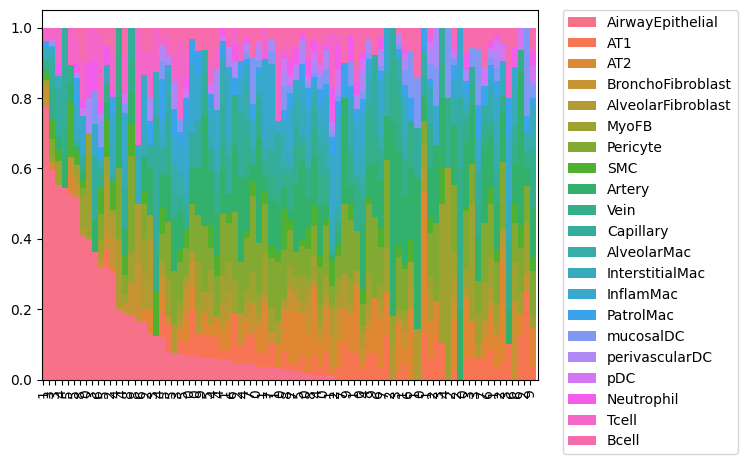

In [8]:
comp_sort = all_plaque_comp.sort_values(by='AirwayEpithelial', ascending=False)
comp_sort.plot(kind='bar', stacked=True, color = sns.color_palette("husl", 21),align='edge', width=1.0)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

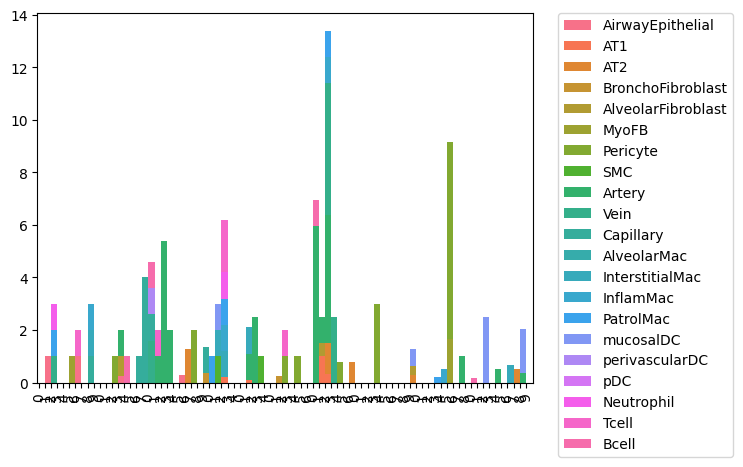

In [9]:
plaque_num_ifn_type.plot(kind='bar', stacked=True, color = sns.color_palette("husl", 21), align='edge', width=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)